In [ ]:
import pandas as pd

file_path = r'../pubchem_data/HTS/AID_884_datatable_all.csv'
df = pd.read_csv(file_path, header=0, skiprows=[1, 2, 3, 4, 5])
print("--- DataFrame (from file) ---")
print(df.head())

--- DataFrame (from file) ---
   PUBCHEM_RESULT_TAG  PUBCHEM_SID  PUBCHEM_CID  \
0                   1     11112150  135398658.0   
1                   2      4253520     266698.0   
2                   3      4239835    3234942.0   
3                   4      4238700    3233809.0   
4                   5     17389122       6348.0   

                       PUBCHEM_EXT_DATASOURCE_SMILES PUBCHEM_ACTIVITY_OUTCOME  \
0  C1=CC(=CC=C1C(=O)N[C@@H](CCC(=O)O)C(=O)O)NCC2=...                 Inactive   
1  C1CCC(C1)(C#N)NC2=CC=C(C=C2)C3=CC=C(C=C3)NC4(C...                 Inactive   
2  COC1=CC=C(C=C1)C2=NC3=CN=C(N=C3N(C2=O)CC4=CC=C...                   Active   
3  COC1=CC=C(C=C1)C2=NC3=CN=C(N=C3N(C2=O)CC4=CC=C...             Inconclusive   
4                                            C(=S)=S                 Inactive   

   PUBCHEM_ACTIVITY_SCORE  PUBCHEM_ACTIVITY_URL  PUBCHEM_ASSAYDATA_COMMENT  \
0                       0                   NaN                        NaN   
1                   

In [ ]:
df.columns

Index(['PUBCHEM_RESULT_TAG', 'PUBCHEM_SID', 'PUBCHEM_CID',
       'PUBCHEM_EXT_DATASOURCE_SMILES', 'PUBCHEM_ACTIVITY_OUTCOME',
       'PUBCHEM_ACTIVITY_SCORE', 'PUBCHEM_ACTIVITY_URL',
       'PUBCHEM_ASSAYDATA_COMMENT', 'Phenotype', 'Potency', 'Efficacy',
       'Analysis Comment', 'Curve_Description', 'Fit_LogAC50', 'Fit_HillSlope',
       'Fit_R2', 'Fit_InfiniteActivity', 'Fit_ZeroActivity', 'Fit_CurveClass',
       'Excluded_Points', 'Max_Response', 'Activity at 0.0007317399 uM',
       'Activity at 0.00164 uM', 'Activity at 0.00366 uM',
       'Activity at 0.00370 uM', 'Activity at 0.00818 uM',
       'Activity at 0.018 uM', 'Activity at 0.041 uM', 'Activity at 0.091 uM',
       'Activity at 0.092 uM', 'Activity at 0.204 uM', 'Activity at 0.457 uM',
       'Activity at 1.022 uM', 'Activity at 2.286 uM', 'Activity at 5.111 uM',
       'Activity at 11.43 uM', 'Activity at 25.56 uM', 'Activity at 57.14 uM',
       'Compound QC'],
      dtype='object')

In [ ]:
df_sel = df[['PUBCHEM_EXT_DATASOURCE_SMILES', 'Activity at 11.43 uM']]
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14155 entries, 0 to 14154
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PUBCHEM_EXT_DATASOURCE_SMILES  14115 non-null  object 
 1   Activity at 11.43 uM           14155 non-null  float64
dtypes: float64(1), object(1)
memory usage: 221.3+ KB


In [ ]:
df_sel.isnull().sum()

PUBCHEM_EXT_DATASOURCE_SMILES    40
Activity at 11.43 uM              0
dtype: int64

In [ ]:
df_sel = df_sel.dropna()
df_sel.isnull().sum()

PUBCHEM_EXT_DATASOURCE_SMILES    0
Activity at 11.43 uM             0
dtype: int64

In [ ]:
# 양수인 행 삭제 (또는 0 이상인 값 삭제)
df_sel = df_sel[df_sel['Activity at 11.43 uM'] < 0]

In [ ]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11713 entries, 0 to 14154
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PUBCHEM_EXT_DATASOURCE_SMILES  11713 non-null  object 
 1   Activity at 11.43 uM           11713 non-null  float64
dtypes: float64(1), object(1)
memory usage: 274.5+ KB


In [ ]:
import pandas as pd
from rdkit import Chem
import io

def smiles_to_canonical(smiles_str):
    try:
        mol = Chem.MolFromSmiles(smiles_str)
        if mol is not None:
            return Chem.MolToSmiles(mol)
        return None
    except:
        return None

df_sel['Canonical_Smiles'] = df_sel['PUBCHEM_EXT_DATASOURCE_SMILES'].apply(smiles_to_canonical)

In [ ]:
df_sel.rename(columns={'Activity at 11.43 uM': 'Inhibition'}, inplace=True)

# Inhibition 값이 100을 초과하는 경우 100으로 설정
df_sel['Inhibition'] = df_sel['Inhibition'].apply(lambda x: min(x, 100))

df_pre = df_sel.copy()

In [ ]:
df_pre = df_pre[['Canonical_Smiles', 'Inhibition']]
df_pre

,Canonical_Smiles,Inhibition
0,Nc1nc2ncc(CNc3ccc(C(=O)N[C@@H](CCC(=O)O)C(=O)O...,-11.5848
1,N#CC1(Nc2ccc(-c3ccc(NC4(C#N)CCCC4)cc3)cc2)CCCC1,-20.8980
2,COc1ccc(-c2nc3cnc(OC)nc3n(Cc3ccc(F)cc3)c2=O)cc1,-100.4650
3,COc1ccc(Oc2ncc3nc(-c4ccc(OC)cc4)c(=O)n(Cc4cccs...,-32.7135
4,S=C=S,-5.4100
...,...,...
14150,COc1c(O)cc2c(-c3ccccc3)cc(=O)oc2c1OC,-8.9293
14151,CCN(CC)CCOC(=O)C(Cc1cccc2ccccc12)CC1CCCO1.O=C(...,-71.5328
14152,COC(=O)[C@@]1(Cc2ccc(F)cc2)[C@H]2c3cc(C(=O)N(C...,-98.0106
14153,CC(=O)OC[C@H]1O[C@@H](O/N=C(\C)CCN2CCc3nc(-c4c...,-41.6105


In [ ]:
# 음수 값들을 양수로 변환
df_pre['Inhibition'] = df_pre['Inhibition'].abs()

In [ ]:
df_pre['Inhibition'] = df_pre['Inhibition'].apply(lambda x: min(x, 100))

In [ ]:
print("\n--- df_pre after transformations ---")
df_pre.info()
print("\n", df_pre.head())


--- df_pre after transformations ---
<class 'pandas.core.frame.DataFrame'>
Index: 11713 entries, 0 to 14154
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Canonical_Smiles  11713 non-null  object 
 1   Inhibition        11713 non-null  float64
dtypes: float64(1), object(1)
memory usage: 274.5+ KB

                                     Canonical_Smiles  Inhibition
0  Nc1nc2ncc(CNc3ccc(C(=O)N[C@@H](CCC(=O)O)C(=O)O...     11.5848
1    N#CC1(Nc2ccc(-c3ccc(NC4(C#N)CCCC4)cc3)cc2)CCCC1     20.8980
2    COc1ccc(-c2nc3cnc(OC)nc3n(Cc3ccc(F)cc3)c2=O)cc1    100.0000
3  COc1ccc(Oc2ncc3nc(-c4ccc(OC)cc4)c(=O)n(Cc4cccs...     32.7135
4                                              S=C=S      5.4100


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

--- 'Inhibition' 컬럼의 기술 통계량 ---
count    11713.000000
mean        29.941137
std         27.221469
min          0.002900
25%          7.998600
50%         19.804600
75%         46.577300
max        100.000000
Name: Inhibition, dtype: float64


정제된 데이터가 'C:\Users\WooSomin\Desktop\AI신약개발\데이콘\processed_data\aid_884_cyp3a4.csv'으로 저장되었습니다.


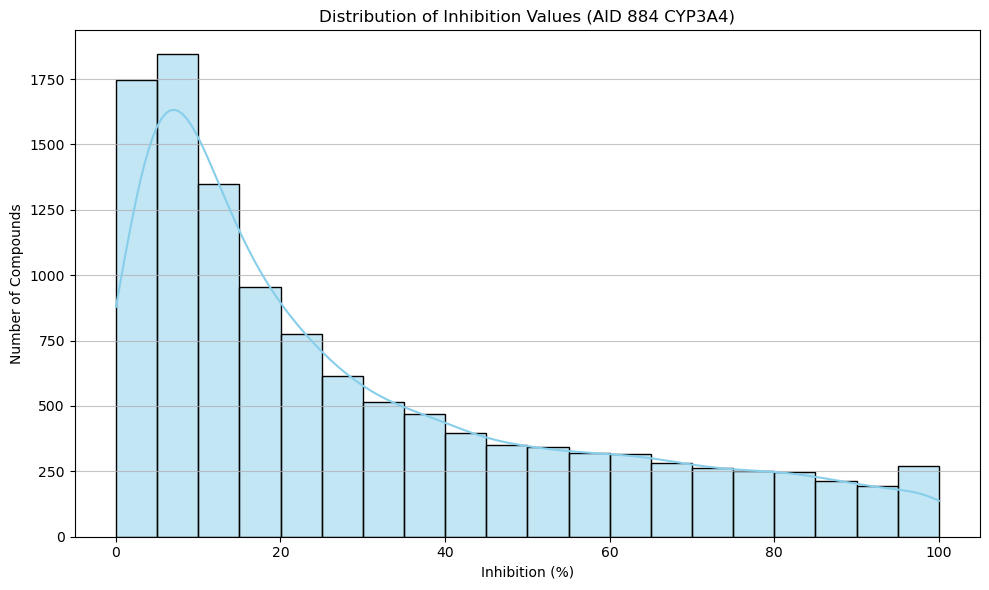

In [ ]:
print("--- 'Inhibition' 컬럼의 기술 통계량 ---")
print(df_pre['Inhibition'].describe())
print("\n")

plt.figure(figsize=(10, 6))
sns.histplot(df_pre['Inhibition'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Inhibition Values (AID 884 CYP3A4)')
plt.xlabel('Inhibition (%)')
plt.ylabel('Number of Compounds')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

output_csv_file_name = r'../processed_data/aid_884_cyp3a4.csv'
df_pre.to_csv(output_csv_file_name, index=False)

print(f"정제된 데이터가 '{output_csv_file_name}'으로 저장되었습니다.")